In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix

In [4]:
#load dataset
df=pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.shape

(302, 14)

In [11]:
df = df.rename(columns={'caa': 'number of major vessels ','thalachh':'MaxHeartRate','trtbps':'RestingBP','cp':'ChestPain'})

In [12]:
df.columns

Index(['age', 'sex', 'ChestPain', 'RestingBP', 'chol', 'fbs', 'restecg',
       'MaxHeartRate', 'exng', 'oldpeak', 'slp', 'number of major vessels ',
       'thall', 'output'],
      dtype='object')

In [13]:
df=df.drop(['slp'], axis=1)
df=df.drop(['thall'], axis=1)
df=df.drop(['oldpeak'], axis=1)
df


,age,sex,ChestPain,RestingBP,chol,fbs,restecg,MaxHeartRate,exng,number of major vessels,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,0
299,45,1,3,110,264,0,1,132,0,0,0
300,68,1,0,144,193,1,1,141,0,2,0
301,57,1,0,130,131,0,1,115,1,1,0


<Axes: xlabel='sex'>

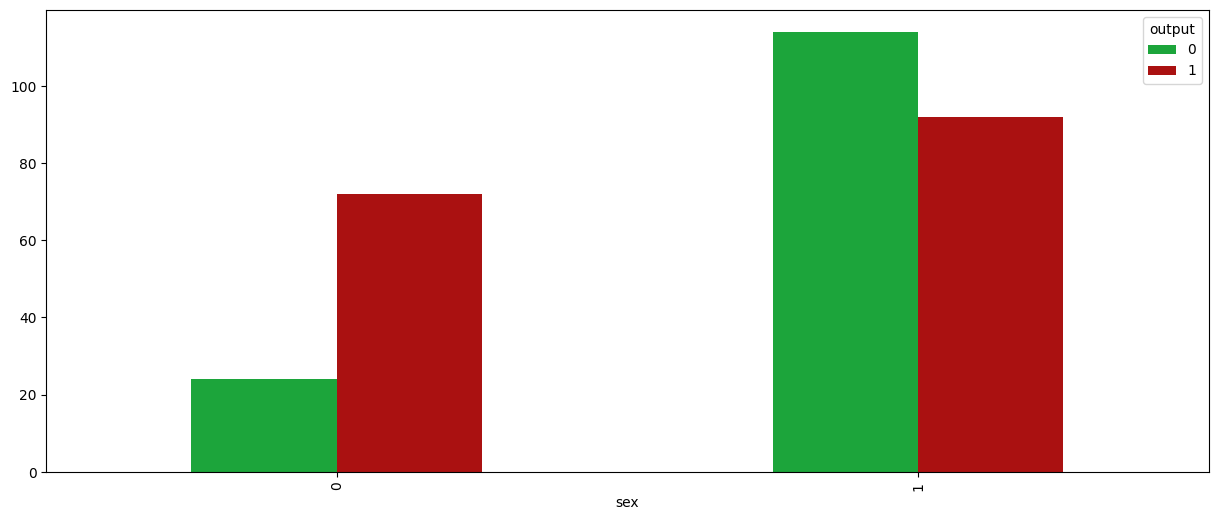

In [14]:
pd.crosstab(df.sex,df.output).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])

In [15]:
#independend and dependent distribution
datapoints=['age','sex','RestingBP','chol', 'MaxHeartRate','exng','ChestPain','fbs']
target=['output']

In [16]:
X=df[datapoints] #independent
Y=df[target] #dependent

In [17]:
X,Y

(     age  sex  RestingBP  chol  MaxHeartRate  exng  ChestPain  fbs
 0     63    1        145   233           150     0          3    1
 1     37    1        130   250           187     0          2    0
 2     41    0        130   204           172     0          1    0
 3     56    1        120   236           178     0          1    0
 4     57    0        120   354           163     1          0    0
 ..   ...  ...        ...   ...           ...   ...        ...  ...
 298   57    0        140   241           123     1          0    0
 299   45    1        110   264           132     0          3    0
 300   68    1        144   193           141     0          0    1
 301   57    1        130   131           115     1          0    0
 302   57    0        130   236           174     0          1    0
 
 [302 rows x 8 columns],
      output
 0         1
 1         1
 2         1
 3         1
 4         1
 ..      ...
 298       0
 299       0
 300       0
 301       0
 302       0
 

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [25]:
#Logistic Regression
logModel=LogisticRegression()
logModel.fit(X_train,Y_train)
logModel.score(X_test,Y_test)

Y_pred=logModel.predict(X_test)
confusion_matrix(Y_test,Y_pred)

/home/harsh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[25, 18],
       [ 6, 42]])

In [20]:
#Linear Regression
linearModel=LinearRegression()
linearModel.fit(X_train,Y_train)
linearModel.score(X_test,Y_test)

0.3472220068048919

In [21]:
#Lasso Regression
lassoModel=Lasso()
lassoModel.fit(X_train,Y_train)
lassoModel.score(X_test,Y_test)

0.1658656560596008

In [22]:
#Ridge Regression
ridgeModel=LinearRegression()
ridgeModel.fit(X_train,Y_train)
ridgeModel.score(X_test,Y_test)

0.3472220068048919